# Observed Taylor law: variance vs mean 
in protein and protein coding gene length distributions   
**for the different species for which we have records in both (proteins and protein coding genes)** 

## Import python modules

In [1]:
import numpy as np
from scipy import stats
import pandas as pd
#
from plotnine import *
if 1:
    import warnings
    warnings.filterwarnings('ignore')

## The protein and protein coding gene length distributions for the different species

### Retrieving the statistical descriptions of the length's distributions

In [2]:
# statistics on length distribution for different species     
stat_file = "../main_tables/stat_merged.tsv"
print("The statistical descriptions for the different species is in:\n", stat_file, "\n")

# retrieve data and diminish the number of columns
stat_df = pd.read_csv(stat_file, low_memory=False, sep="\t")
stat_df = stat_df[["merged_division_superregnum", "prots_superregnum", "genes_species", "prots_mean", "prots_var"] + ["genes_mean", "genes_var"]] 

# visualize data
pd.set_option('display.max_columns', None)
if 1:
    display(stat_df.head(2))
    print(stat_df.shape)
    print(stat_df["merged_division_superregnum"].value_counts())

The statistical descriptions for the different species is in:
 ../main_tables/stat_merged.tsv 



,merged_division_superregnum,prots_superregnum,genes_species,prots_mean,prots_var,genes_mean,genes_var
0,bacteria,bacteria,archangium_gephyra_gca_001027285,367.499703,141204.779058,1103.871035,1.270278e+06
1,bacteria,bacteria,chondromyces_crocatus_gca_001189295,403.466555,122906.027917,1211.514450,1.105460e+06


(6521, 7)
bacteria       5468
fungi           533
archaea         227
vertebrates      94
protist          91
plants           59
metazoa          49
Name: merged_division_superregnum, dtype: int64


## Python functions

In [3]:
# FUNCTIONS
###########
def plot_taylor_genes(df2plot, col_x, col_y, x_lab, y_lab, title, bool_show_regression): 
    # Calculate best fit line
    slope, intercept, r_value, p_value, std_err = stats.linregress(np.log10(df2plot[col_x]),np.log10(df2plot[col_y]))
    # Format the regression text
    print('v = {:4.4} * m^{:4.4};   R^2= {:2.4f}'.format(10**intercept, slope, r_value**2))
    if bool_show_regression:
        txt = '$\sigma^{2} = ' + '{:4.2} '.format(10**intercept)  + '\t \mu^{' + '{:4.3}'.format(slope) + '}' + ';\tR^{2} = ' + '{:2.2f}$'.format(r_value**2)
    else:
        txt = ''
        
    # limits and tick-breaks
    x_limits=[min(df2plot[col_x].to_list())/1.3, 1.3*max(df2plot[col_x].to_list())]
    y_limits=[min(df2plot[col_y].to_list())/1.3, 1.3*max(df2plot[col_y].to_list())]
    x_text_factor = 0.015
    y_text_factor = 0.95
        
    p = (   
        ggplot(df2plot, aes(col_x, col_y, color=legends_by)) + geom_point(size=0.1)
        + geom_smooth(method="lm", color="green", size=0.25, span=.8)
        + labs(title=title, x=x_lab, y=y_lab) 
        + scale_color_manual(values=['#D83B01', '#002050', '#A80000', '#FFA500', '#107C10','#EF008C', '#0078D7', '#B4009E']) # + scale_color_brewer() '#5C2D91'
        + labs(color='Clade') # legend title
        + scale_x_log10(breaks=[10 ** power for power in range(1, 6)], limits=x_limits) #, labels=scientific_format(digits=2)
        + scale_y_log10(breaks = [10**power for power in range(3, 11)], limits=y_limits)
    ) + theme(legend_position=(0.8,0.3), legend_key_size=5, legend_background=element_rect(fill='grey', alpha=0.01)) + annotate('text', x=x_text_factor*max(df2plot[col_x].to_list()), y=y_text_factor*max(df2plot[col_y].to_list()), label=txt,size=9,color="black")
    print(p)


def plot_taylor_prots(df2plot, col_x, col_y, x_lab, y_lab, title, bool_show_regression): 
    # Calculate best fit line
    slope, intercept, r_value, p_value, std_err = stats.linregress(np.log10(df2plot[col_x]),np.log10(df2plot[col_y]))
    # Format the regression text
    print('v = {:4.4} * m^{:4.4};   R^2= {:2.4f}'.format(10**intercept, slope, r_value**2))
    if bool_show_regression:
        txt = '$\sigma^{2} = ' + '{:4.2} '.format(10**intercept)  + '\t \mu^{' + '{:4.3}'.format(slope) + '}' + ';\tR^{2} = ' + '{:2.2f}$'.format(r_value**2)
    else:
        txt = ''
        
    # limits and tick-breaks
    x_limits=[min(df2plot[col_x].to_list())/1.3, 1.3*max(df2plot[col_x].to_list())]
    y_limits=[min(df2plot[col_y].to_list())/1.3, 1.3*max(df2plot[col_y].to_list())]
    x_text_factor = 0.03#0.22
    y_text_factor = 0.95
        
    p = (   
        ggplot(df2plot, aes(col_x, col_y, color=legends_by)) + geom_point(size=0.1)
        + geom_smooth(method="lm", color="green", size=0.25, span=.8)
        + labs(title=title, x=x_lab, y=y_lab) 
        + scale_color_manual(values=['#D83B01', '#002050', '#A80000', '#FFA500', '#107C10','#EF008C', '#0078D7', '#B4009E']) # + scale_color_brewer() '#5C2D91'
        + labs(color='Clade') # legend title
        + scale_x_log10(breaks=[100 + 100 * f for f in range(0, 10, 2)], limits=x_limits) #, labels=scientific_format(digits=2)
        + scale_y_log10(breaks = [10**power for power in range(3, 7)], limits=y_limits)
    ) + theme(legend_position=(0.8,0.3), legend_key_size=5, legend_background=element_rect(fill='grey', alpha=0.01)) + annotate('text', x=x_text_factor*max(df2plot[col_x].to_list()), y=y_text_factor*max(df2plot[col_y].to_list()), label=txt,size=9,color="black")
    print(p)

## Observations: variance vs. mean (represented in $log_{10}$ scale)
$\sigma^{2}$ is the variance   
$\mu$ is the mean 

### Protein coding gene length distributions (merged set)

(6521, 3)
v = 0.01182 * m^2.55;   R^2= 0.9506


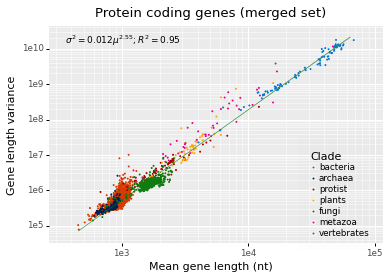

In [4]:
df2plot = stat_df.copy()
df2plot.rename(columns = {"mean" : 'genes_mean', "var" : 'genes_var'}, inplace = True)
#display(df2plot)

col_x = "genes_mean"
col_y = "genes_var"
legends_by = "merged_division_superregnum"

title = "Protein coding genes (merged set)"
x_lab = "Mean gene length (nt)"
y_lab = "Gene length variance"
bool_show_regression = True

df2plot = df2plot[[legends_by, col_x, col_y]]
print(df2plot.shape)

# Sort legends: clades in an order
df2plot[legends_by] = pd.Categorical(df2plot[legends_by], 
                                categories=['bacteria', 'archaea', 'protist', 'plants', 'fungi', 'metazoa', 'vertebrates'],
                                ordered=True)
df2plot.sort_values(legends_by, inplace=True)

plot_taylor_genes(df2plot, col_x, col_y, x_lab, y_lab, title, bool_show_regression)

### Protein length distributions (merged set)

(6521, 3)
v = 0.01321 * m^2.641;   R^2= 0.7225


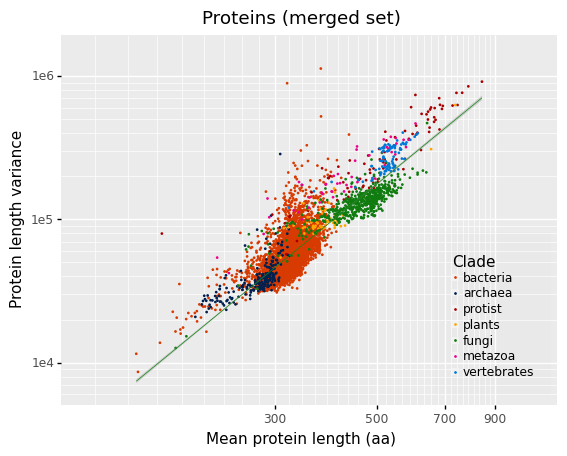

In [5]:
df2plot = stat_df.copy()
df2plot.rename(columns = {"mean" : 'prots_mean', "var" : 'prots_var'}, inplace = True)
#display(df2plot)

col_x = "prots_mean"
col_y = "prots_var"
legends_by = "merged_division_superregnum"
#
title = "Proteins (merged set)"
x_lab = "Mean protein length (aa)"
y_lab = "Protein length variance"
bool_show_regression = True

df2plot = df2plot[[legends_by, col_x, col_y]]
print(df2plot.shape)

# Sort legends: clades in an order
df2plot[legends_by] = pd.Categorical(df2plot[legends_by], 
                                categories=['bacteria', 'archaea', 'protist', 'plants', 'fungi', 'metazoa', 'vertebrates'],
                                ordered=True)
df2plot.sort_values(legends_by, inplace=True)

plot_taylor_prots(df2plot, col_x, col_y, x_lab, y_lab, title, bool_show_regression)

#### Note:  
$\sigma^{2} = a . \mu^{\beta}$   
Because the regression line is:  
$\log(\sigma^{2}) = \log(a) + \beta log(\mu) $